# 손글씨 분류기 

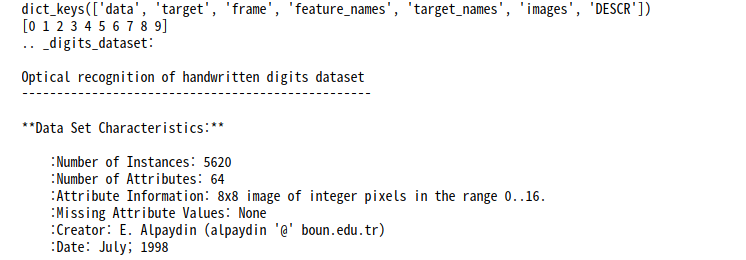

+ 손글씨 분류 데이터 셋   
  
    +총데이터: 1794          
    +class: 10개 (0 ~ 9까지)       
    +feature : 64

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

### 데이터를 준비합니다. 

In [10]:
digits = load_digits()
digits.keys()
data = digits.data
label = digits.target

### 데이터 이해하기 

In [30]:
print(digits.keys())
print(digits.target_names)
print(digits.DESCR)
data.shape

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set

(1797, 64)

### train,test 데이터 분리

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

### 다양한 모델로 학습시켜보기 

#### 1번 Desicion Tree 

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.88      0.79      0.83        28
           2       0.81      0.76      0.78        33
           3       0.77      0.88      0.82        34
           4       0.84      0.93      0.89        46
           5       0.89      0.87      0.88        47
           6       0.92      0.97      0.94        35
           7       0.91      0.88      0.90        34
           8       0.83      0.67      0.74        30
           9       0.77      0.85      0.81        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.85       360



#### 2번 랜덤포레스트

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.94      0.97      0.96        34
           8       1.00      0.93      0.97        30
           9       0.97      0.93      0.95        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360



### 3번 SVM

In [24]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### SGD classification

In [27]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.86      0.91        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.93      0.91      0.92        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.78      0.93      0.85        30
           9       0.92      0.90      0.91        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



## (5)LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



/home/ssac11/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### (6) 모델을 평가해보기 

SVM모델을 사용하고자 한다.     

일단 우리의 데이터는 recall과 precision사이에서 데이터를 잘 골라야 한다.   

0이 아닌 것도 0이라고 하는 것 보다, 0인 것을 0이 아니다라고 판단하는게 더 낫다고 생각한다.  (recall이 높다)

그래서 일단 둘다 높고 정확도도 높은 모델인 SVM을 선택하게 되었습니다. 